In [80]:
import numpy as np #for multi dimentional array
import pandas as pd
from matplotlib import pyplot as plt # for image display

In [81]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [82]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T #Transpose data inother for each column to be an example rather than each row.

Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255.

data_train =data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.
_,m_train = X_train.shape


In [84]:
Y_train

array([2, 3, 2, ..., 8, 1, 2])

In [85]:
def init_param():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)
    b2=np.random.rand(10,1)-0.5
    return W1, b1,W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def foward_prop(W1, b1,W2, b2, X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1, A1,Z2, A2
    
def one(Y):
    one_Y=np.zeros((Y.size, Y.max()+1))
    one_Y[np.arange(Y.size),Y] =1
    one_Y=one_Y.T
    return one_Y
def deriv_ReLu(Z):
    return Z>0

def back_prop(Z1, A1,Z2, A2,W1, W2, X, Y):
    one_Y =one(Y)
    dZ2=A2-one_Y
    dW2=1/m * dZ2.dot(A1.T)
    db2=1/m * np.sum(dZ2)
    dZ1=W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)
    return dW1, db1,dW2, db2

def update_params(W1, b1,W2, b2,dW1, db1,dW2, db2, beta):
    W1=W1-beta * dW1
    b1=b1-beta * db1
    W2=W2 - beta * dW2
    b2=b2-beta * db2
    return W1,b1, W2, b2

In [86]:
def get_prediction(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y) /Y.size

def gradient_descent(X,Y, iterations,beta):
    W1, b1,W2,b2=init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2=foward_prop(W1, b1,W2, b2, X)
        dW1, db1,dW2, db2=back_prop(Z1, A1,Z2, A2,W1, W2, X, Y)
        W1, b1,W2,b2=update_params(W1, b1,W2, b2,dW1, db1,dW2, db2, beta)
        if (i % 10) ==0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_prediction(A2), Y))
    return W1, b1,W2,b2

In [87]:
W1,b1, W2, b2=gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[1 1 4 ... 2 4 4] [2 3 2 ... 8 1 2]
Accuracy:  0.06331707317073171
Iteration:  10
[1 9 1 ... 9 4 1] [2 3 2 ... 8 1 2]
Accuracy:  0.12960975609756098
Iteration:  20
[1 3 1 ... 3 1 1] [2 3 2 ... 8 1 2]
Accuracy:  0.19475609756097562
Iteration:  30
[1 3 1 ... 3 1 1] [2 3 2 ... 8 1 2]
Accuracy:  0.26370731707317074
Iteration:  40
[1 9 1 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.3352926829268293
Iteration:  50
[1 9 1 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.3809512195121951
Iteration:  60
[1 9 1 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.4204390243902439
Iteration:  70
[1 9 1 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.46178048780487807
Iteration:  80
[1 9 2 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.5034878048780488
Iteration:  90
[1 3 2 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.5360975609756098
Iteration:  100
[2 8 2 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.5697560975609756
Iteration:  110
[2 8 2 ... 3 1 2] [2 3 2 ... 8 1 2]
Accuracy:  0.5982926829268292
Iteration:  120
[2 8 2

In [96]:
def make_predictions(X, W1,b1,W2,b2):
    _, _, _, A2 = foward_prop(W1, b1, W2, b2, X)
    predictions=get_prediction(A2)
    return predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image=X_train[:,index, None]
    prediction= make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label=Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


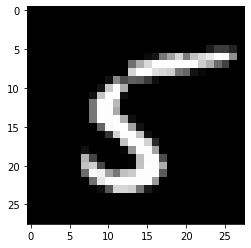

In [97]:
test_prediction(5, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


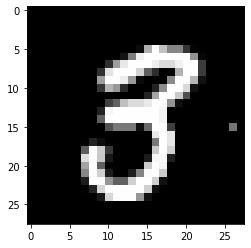

Prediction:  [2]
Label:  2


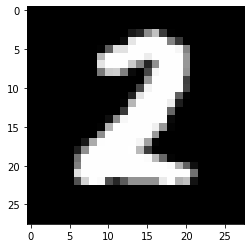

Prediction:  [4]
Label:  4


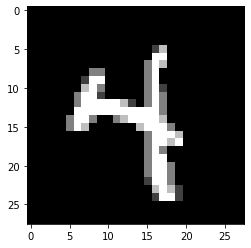

In [98]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [3]
Label:  8


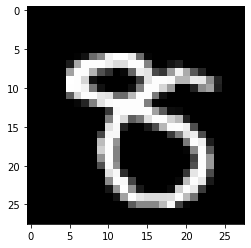

In [103]:
test_prediction(111, W1, b1, W2, b2)

In [104]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 8 7 3 0 6 9 9 8 4 5 5 8 9 8 2 0 8 8 0 9 0 9 8 4 8 1 9 9 4 2 2 2 8 1 8
 5 0 0 3 8 6 1 9 8 3 8 0 2 0 8 9 3 1 9 0 4 1 8 7 5 2 3 7 7 4 7 8 4 7 6 4 0
 7 8 2 7 0 7 4 5 1 6 6 5 8 2 9 8 3 0 6 2 9 6 0 9 6 1 9 0 0 1 5 1 1 9 0 0 8
 1 7 6 6 5 7 7 9 2 1 3 9 0 7 1 0 5 6 3 4 8 6 2 7 7 8 0 8 5 1 8 3 1 9 8 8 9
 3 9 6 1 5 8 4 4 2 1 9 4 2 2 6 1 4 3 6 6 1 8 6 8 0 6 0 2 4 3 4 5 7 3 6 4 8
 6 2 6 9 1 2 0 2 7 8 7 4 7 3 9 3 7 8 1 1 1 2 0 9 9 8 5 5 0 4 4 4 8 7 1 9 4
 6 9 6 1 3 6 5 9 0 3 7 9 2 9 7 6 2 3 4 4 8 2 6 8 2 1 1 7 8 4 4 4 3 6 7 3 3
 3 4 9 7 6 1 3 2 3 3 4 3 3 5 7 7 0 6 2 1 5 6 8 6 1 9 8 3 1 1 3 7 1 0 3 7 8
 0 0 6 2 0 2 9 8 6 3 5 4 0 4 0 7 5 8 2 3 1 2 0 7 4 9 0 6 0 4 6 4 5 5 8 7 7
 3 7 8 9 2 1 2 9 9 3 8 7 5 0 7 6 1 2 8 5 0 7 2 7 3 5 8 7 2 1 0 8 8 1 3 6 9
 6 2 6 9 7 0 6 8 2 9 3 8 7 1 0 3 8 2 1 8 2 4 2 4 1 0 7 5 8 4 1 4 6 5 3 9 6
 4 2 8 4 5 4 0 8 8 7 4 2 3 3 8 1 9 3 1 7 6 7 9 3 2 2 8 8 0 1 3 5 6 5 4 4 1
 9 1 3 9 1 1 6 6 9 6 9 3 7 3 3 3 0 9 8 3 0 9 8 0 1 2 7 7 4 1 2 6 9 2 5 5 9
 6 6 8 2 6 5 0 6 7 2 1 2 

0.844

In [105]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 8 7 3 0 6 9 9 8 4 5 5 8 9 8 2 0 8 8 0 9 0 9 8 4 8 1 9 9 4 2 2 2 8 1 8
 5 0 0 3 8 6 1 9 8 3 8 0 2 0 8 9 3 1 9 0 4 1 8 7 5 2 3 7 7 4 7 8 4 7 6 4 0
 7 8 2 7 0 7 4 5 1 6 6 5 8 2 9 8 3 0 6 2 9 6 0 9 6 1 9 0 0 1 5 1 1 9 0 0 8
 1 7 6 6 5 7 7 9 2 1 3 9 0 7 1 0 5 6 3 4 8 6 2 7 7 8 0 8 5 1 8 3 1 9 8 8 9
 3 9 6 1 5 8 4 4 2 1 9 4 2 2 6 1 4 3 6 6 1 8 6 8 0 6 0 2 4 3 4 5 7 3 6 4 8
 6 2 6 9 1 2 0 2 7 8 7 4 7 3 9 3 7 8 1 1 1 2 0 9 9 8 5 5 0 4 4 4 8 7 1 9 4
 6 9 6 1 3 6 5 9 0 3 7 9 2 9 7 6 2 3 4 4 8 2 6 8 2 1 1 7 8 4 4 4 3 6 7 3 3
 3 4 9 7 6 1 3 2 3 3 4 3 3 5 7 7 0 6 2 1 5 6 8 6 1 9 8 3 1 1 3 7 1 0 3 7 8
 0 0 6 2 0 2 9 8 6 3 5 4 0 4 0 7 5 8 2 3 1 2 0 7 4 9 0 6 0 4 6 4 5 5 8 7 7
 3 7 8 9 2 1 2 9 9 3 8 7 5 0 7 6 1 2 8 5 0 7 2 7 3 5 8 7 2 1 0 8 8 1 3 6 9
 6 2 6 9 7 0 6 8 2 9 3 8 7 1 0 3 8 2 1 8 2 4 2 4 1 0 7 5 8 4 1 4 6 5 3 9 6
 4 2 8 4 5 4 0 8 8 7 4 2 3 3 8 1 9 3 1 7 6 7 9 3 2 2 8 8 0 1 3 5 6 5 4 4 1
 9 1 3 9 1 1 6 6 9 6 9 3 7 3 3 3 0 9 8 3 0 9 8 0 1 2 7 7 4 1 2 6 9 2 5 5 9
 6 6 8 2 6 5 0 6 7 2 1 2 

0.844

Prediction:  [8]
Label:  2


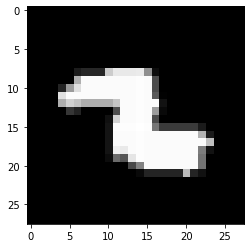

Prediction:  [5]
Label:  5


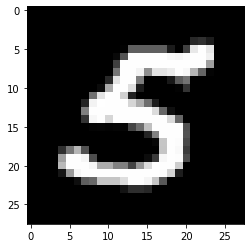

Prediction:  [5]
Label:  5


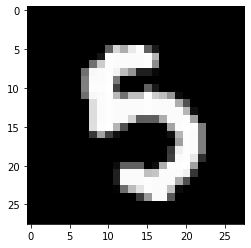

Prediction:  [1]
Label:  1


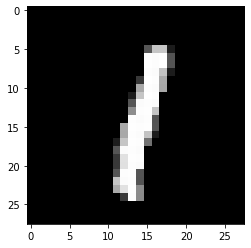

Prediction:  [1]
Label:  1


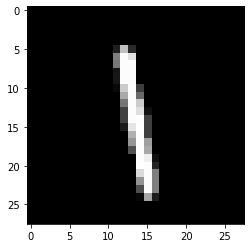

Prediction:  [6]
Label:  6


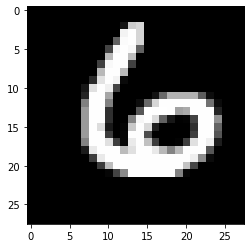

Prediction:  [8]
Label:  8


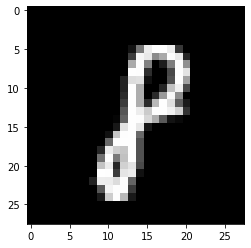

Prediction:  [3]
Label:  3


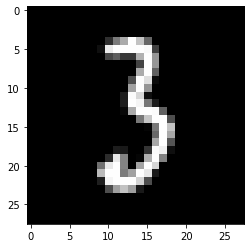

Prediction:  [8]
Label:  8


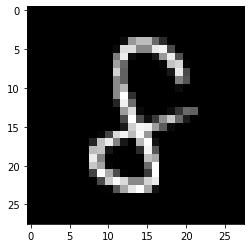

Prediction:  [2]
Label:  2


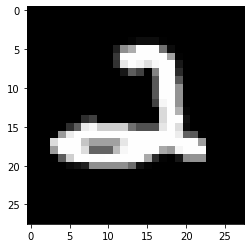

Prediction:  [6]
Label:  6


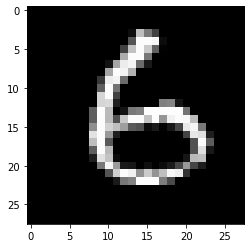

Prediction:  [1]
Label:  1


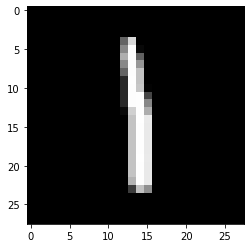

Prediction:  [3]
Label:  3


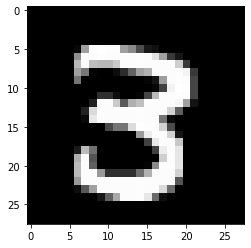

Prediction:  [8]
Label:  8


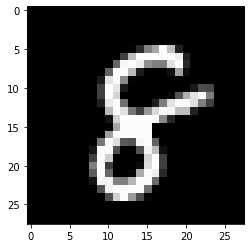

Prediction:  [4]
Label:  4


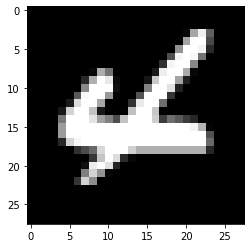

Prediction:  [1]
Label:  1


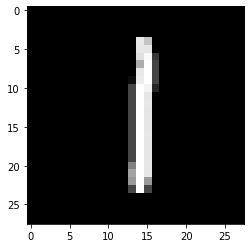

Prediction:  [9]
Label:  9


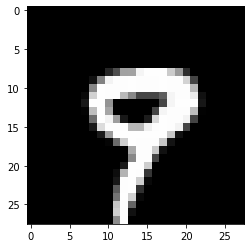

Prediction:  [6]
Label:  6


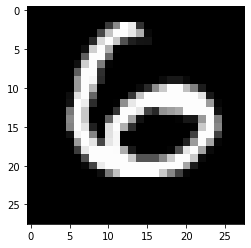

Prediction:  [7]
Label:  7


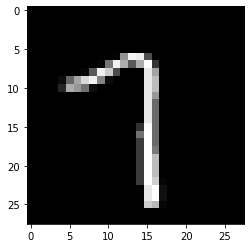

Prediction:  [9]
Label:  9


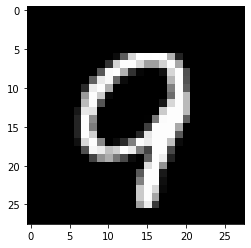

In [106]:
for i in range(20):
    test_prediction(i+125, W1, b1, W2, b2)

Prediction:  [8]
Label:  9


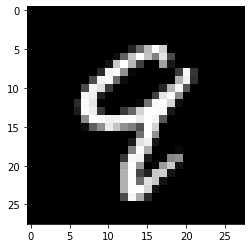

Prediction:  [1]
Label:  1


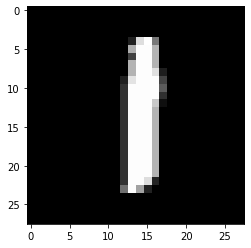

Prediction:  [3]
Label:  3


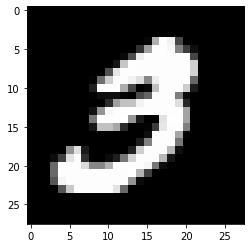

Prediction:  [7]
Label:  7


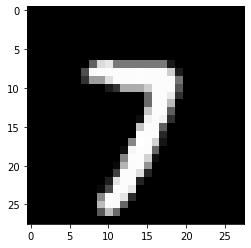

Prediction:  [6]
Label:  6


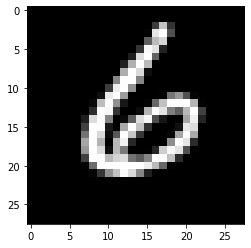

Prediction:  [2]
Label:  2


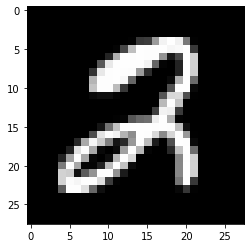

Prediction:  [1]
Label:  1


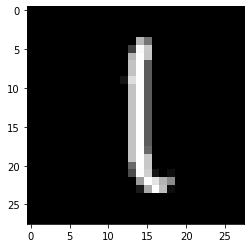

Prediction:  [4]
Label:  9


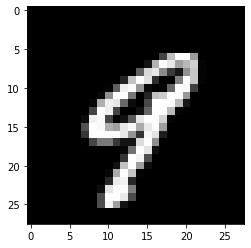

Prediction:  [1]
Label:  1


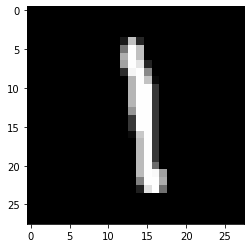

Prediction:  [8]
Label:  8


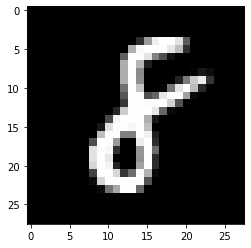

Prediction:  [2]
Label:  8


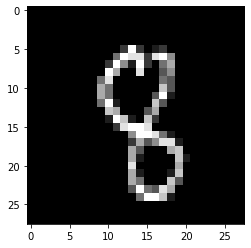

Prediction:  [0]
Label:  0


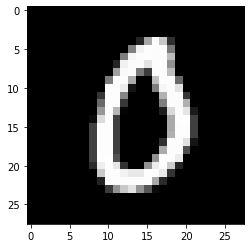

Prediction:  [1]
Label:  1


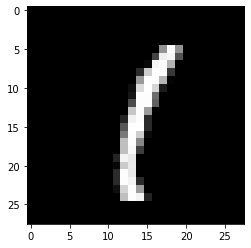

Prediction:  [1]
Label:  1


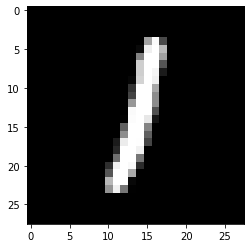

Prediction:  [8]
Label:  8


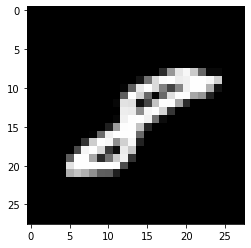

Prediction:  [7]
Label:  7


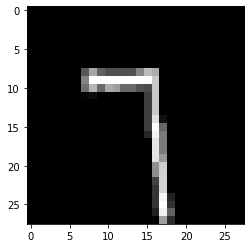

Prediction:  [2]
Label:  2


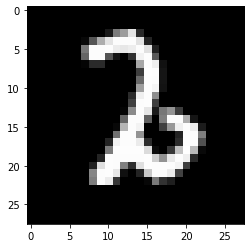

Prediction:  [6]
Label:  6


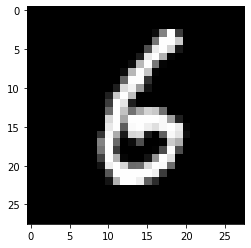

Prediction:  [4]
Label:  4


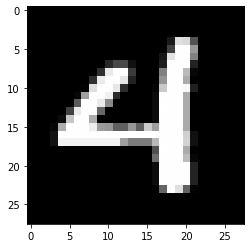

Prediction:  [8]
Label:  8


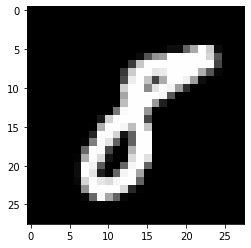

In [109]:
for i in range(20):
    test_prediction(i+40, W1, b1, W2, b2)

**Result == 17/20
Got 3 prediction wrong Accuracy 84.4**

In [108]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 8 7 3 0 6 9 9 8 4 5 5 8 9 8 2 0 8 8 0 9 0 9 8 4 8 1 9 9 4 2 2 2 8 1 8
 5 0 0 3 8 6 1 9 8 3 8 0 2 0 8 9 3 1 9 0 4 1 8 7 5 2 3 7 7 4 7 8 4 7 6 4 0
 7 8 2 7 0 7 4 5 1 6 6 5 8 2 9 8 3 0 6 2 9 6 0 9 6 1 9 0 0 1 5 1 1 9 0 0 8
 1 7 6 6 5 7 7 9 2 1 3 9 0 7 1 0 5 6 3 4 8 6 2 7 7 8 0 8 5 1 8 3 1 9 8 8 9
 3 9 6 1 5 8 4 4 2 1 9 4 2 2 6 1 4 3 6 6 1 8 6 8 0 6 0 2 4 3 4 5 7 3 6 4 8
 6 2 6 9 1 2 0 2 7 8 7 4 7 3 9 3 7 8 1 1 1 2 0 9 9 8 5 5 0 4 4 4 8 7 1 9 4
 6 9 6 1 3 6 5 9 0 3 7 9 2 9 7 6 2 3 4 4 8 2 6 8 2 1 1 7 8 4 4 4 3 6 7 3 3
 3 4 9 7 6 1 3 2 3 3 4 3 3 5 7 7 0 6 2 1 5 6 8 6 1 9 8 3 1 1 3 7 1 0 3 7 8
 0 0 6 2 0 2 9 8 6 3 5 4 0 4 0 7 5 8 2 3 1 2 0 7 4 9 0 6 0 4 6 4 5 5 8 7 7
 3 7 8 9 2 1 2 9 9 3 8 7 5 0 7 6 1 2 8 5 0 7 2 7 3 5 8 7 2 1 0 8 8 1 3 6 9
 6 2 6 9 7 0 6 8 2 9 3 8 7 1 0 3 8 2 1 8 2 4 2 4 1 0 7 5 8 4 1 4 6 5 3 9 6
 4 2 8 4 5 4 0 8 8 7 4 2 3 3 8 1 9 3 1 7 6 7 9 3 2 2 8 8 0 1 3 5 6 5 4 4 1
 9 1 3 9 1 1 6 6 9 6 9 3 7 3 3 3 0 9 8 3 0 9 8 0 1 2 7 7 4 1 2 6 9 2 5 5 9
 6 6 8 2 6 5 0 6 7 2 1 2 

0.844

In [110]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 8 7 3 0 6 9 9 8 4 5 5 8 9 8 2 0 8 8 0 9 0 9 8 4 8 1 9 9 4 2 2 2 8 1 8
 5 0 0 3 8 6 1 9 8 3 8 0 2 0 8 9 3 1 9 0 4 1 8 7 5 2 3 7 7 4 7 8 4 7 6 4 0
 7 8 2 7 0 7 4 5 1 6 6 5 8 2 9 8 3 0 6 2 9 6 0 9 6 1 9 0 0 1 5 1 1 9 0 0 8
 1 7 6 6 5 7 7 9 2 1 3 9 0 7 1 0 5 6 3 4 8 6 2 7 7 8 0 8 5 1 8 3 1 9 8 8 9
 3 9 6 1 5 8 4 4 2 1 9 4 2 2 6 1 4 3 6 6 1 8 6 8 0 6 0 2 4 3 4 5 7 3 6 4 8
 6 2 6 9 1 2 0 2 7 8 7 4 7 3 9 3 7 8 1 1 1 2 0 9 9 8 5 5 0 4 4 4 8 7 1 9 4
 6 9 6 1 3 6 5 9 0 3 7 9 2 9 7 6 2 3 4 4 8 2 6 8 2 1 1 7 8 4 4 4 3 6 7 3 3
 3 4 9 7 6 1 3 2 3 3 4 3 3 5 7 7 0 6 2 1 5 6 8 6 1 9 8 3 1 1 3 7 1 0 3 7 8
 0 0 6 2 0 2 9 8 6 3 5 4 0 4 0 7 5 8 2 3 1 2 0 7 4 9 0 6 0 4 6 4 5 5 8 7 7
 3 7 8 9 2 1 2 9 9 3 8 7 5 0 7 6 1 2 8 5 0 7 2 7 3 5 8 7 2 1 0 8 8 1 3 6 9
 6 2 6 9 7 0 6 8 2 9 3 8 7 1 0 3 8 2 1 8 2 4 2 4 1 0 7 5 8 4 1 4 6 5 3 9 6
 4 2 8 4 5 4 0 8 8 7 4 2 3 3 8 1 9 3 1 7 6 7 9 3 2 2 8 8 0 1 3 5 6 5 4 4 1
 9 1 3 9 1 1 6 6 9 6 9 3 7 3 3 3 0 9 8 3 0 9 8 0 1 2 7 7 4 1 2 6 9 2 5 5 9
 6 6 8 2 6 5 0 6 7 2 1 2 

0.844

Prediction:  [4]
Label:  4


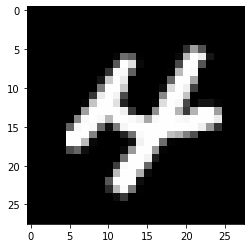

Prediction:  [6]
Label:  6


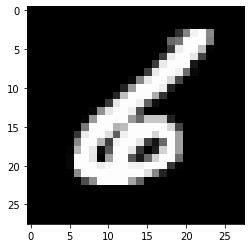

Prediction:  [7]
Label:  7


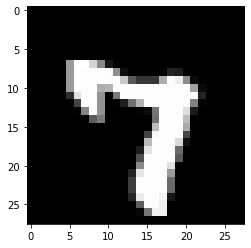

Prediction:  [1]
Label:  1


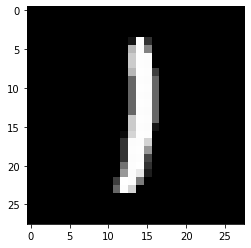

Prediction:  [9]
Label:  9


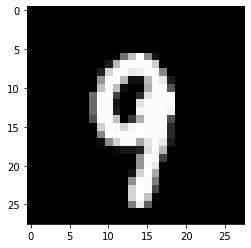

Prediction:  [1]
Label:  1


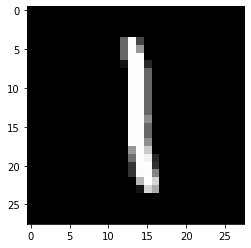

Prediction:  [1]
Label:  1


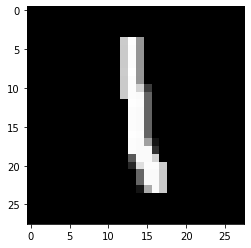

Prediction:  [8]
Label:  8


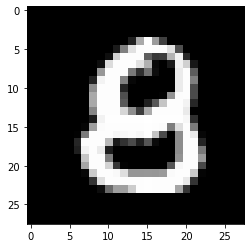

Prediction:  [1]
Label:  1


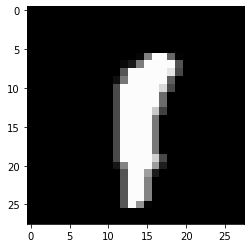

Prediction:  [4]
Label:  4


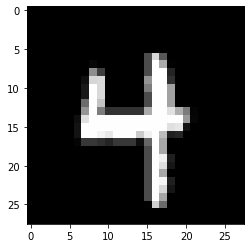

Prediction:  [2]
Label:  2


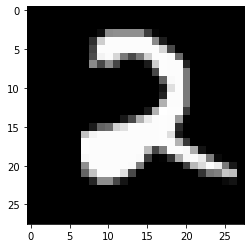

Prediction:  [3]
Label:  3


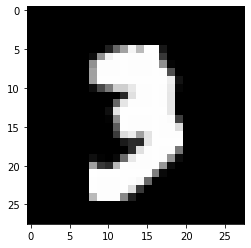

Prediction:  [4]
Label:  9


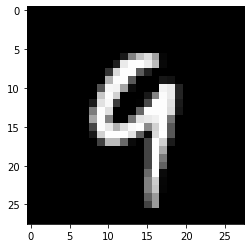

Prediction:  [2]
Label:  2


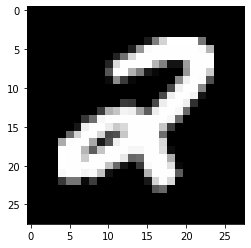

Prediction:  [6]
Label:  5


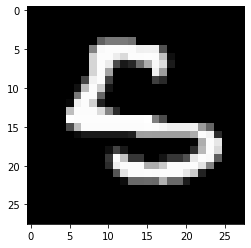

Prediction:  [6]
Label:  6


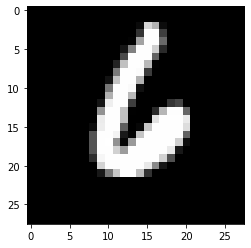

Prediction:  [7]
Label:  7


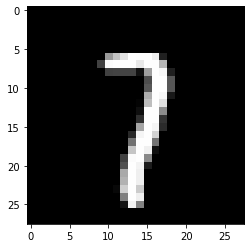

Prediction:  [2]
Label:  4


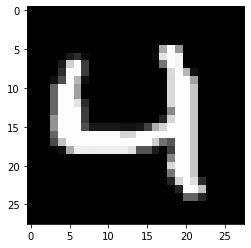

Prediction:  [7]
Label:  9


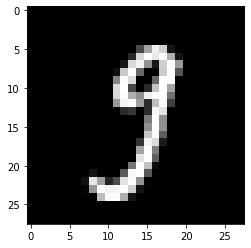

Prediction:  [4]
Label:  4


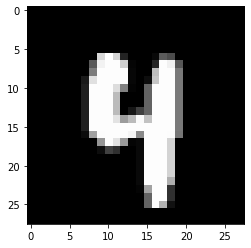

In [111]:
for i in range(20):
    test_prediction(i+70, W1, b1, W2, b2)

In [112]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 0 8 7 3 0 6 9 9 8 4 5 5 8 9 8 2 0 8 8 0 9 0 9 8 4 8 1 9 9 4 2 2 2 8 1 8
 5 0 0 3 8 6 1 9 8 3 8 0 2 0 8 9 3 1 9 0 4 1 8 7 5 2 3 7 7 4 7 8 4 7 6 4 0
 7 8 2 7 0 7 4 5 1 6 6 5 8 2 9 8 3 0 6 2 9 6 0 9 6 1 9 0 0 1 5 1 1 9 0 0 8
 1 7 6 6 5 7 7 9 2 1 3 9 0 7 1 0 5 6 3 4 8 6 2 7 7 8 0 8 5 1 8 3 1 9 8 8 9
 3 9 6 1 5 8 4 4 2 1 9 4 2 2 6 1 4 3 6 6 1 8 6 8 0 6 0 2 4 3 4 5 7 3 6 4 8
 6 2 6 9 1 2 0 2 7 8 7 4 7 3 9 3 7 8 1 1 1 2 0 9 9 8 5 5 0 4 4 4 8 7 1 9 4
 6 9 6 1 3 6 5 9 0 3 7 9 2 9 7 6 2 3 4 4 8 2 6 8 2 1 1 7 8 4 4 4 3 6 7 3 3
 3 4 9 7 6 1 3 2 3 3 4 3 3 5 7 7 0 6 2 1 5 6 8 6 1 9 8 3 1 1 3 7 1 0 3 7 8
 0 0 6 2 0 2 9 8 6 3 5 4 0 4 0 7 5 8 2 3 1 2 0 7 4 9 0 6 0 4 6 4 5 5 8 7 7
 3 7 8 9 2 1 2 9 9 3 8 7 5 0 7 6 1 2 8 5 0 7 2 7 3 5 8 7 2 1 0 8 8 1 3 6 9
 6 2 6 9 7 0 6 8 2 9 3 8 7 1 0 3 8 2 1 8 2 4 2 4 1 0 7 5 8 4 1 4 6 5 3 9 6
 4 2 8 4 5 4 0 8 8 7 4 2 3 3 8 1 9 3 1 7 6 7 9 3 2 2 8 8 0 1 3 5 6 5 4 4 1
 9 1 3 9 1 1 6 6 9 6 9 3 7 3 3 3 0 9 8 3 0 9 8 0 1 2 7 7 4 1 2 6 9 2 5 5 9
 6 6 8 2 6 5 0 6 7 2 1 2 

0.844